## Observations and Insights 

In [ ]:
-Mouse number g989 has multiple entries for the same timeline making its entries invalid. All its records are excluded from the report.
-Overall, the data seems to be uniformly distributed by looking at gender and number of mice per regimen.
-There are no outliers identified based on the final tumor volume. All volume entries are within the limits of lower and upper bounds.
-There is a significant decline on the tumor volume for the mouse s185 which is on Capomulin.
-Average tumor volume and weight are positively correlated for the subjects on Capomulin.



In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID" )
# Display the data table for preview

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_t = merged_data
duplicate_id = dups_t[dups_t[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_id = duplicate_id["Mouse ID"]
drop_mouse = pd.DataFrame(duplicate_id.drop_duplicates())
drop_mouse

,Mouse ID
909,g989


In [18]:
# Drop the records for the mice with duplicate Timepoint Values
Analysis_data_t = pd.merge(merged_data, drop_mouse, on=['Mouse ID'], how="outer", indicator=True)
Analysis_data_t = (Analysis_data_t[Analysis_data_t['_merge'] == 'left_only'])
Analysis_data = pd.DataFrame(Analysis_data_t)

In [19]:
#with pd.ExcelWriter("data/Analysis_data.xlsx") as writer:
    
 #   Analysis_data.to_excel(writer, sheet_name = 'Analysis_data', index=True, header=True)  

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
Data_duplicate_mouse = pd.merge(merged_data, drop_mouse, on=['Mouse ID'], indicator=True)
Data_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,g989,Propriva,Female,21,26,0,45.000000,0,both
1,g989,Propriva,Female,21,26,0,45.000000,0,both
2,g989,Propriva,Female,21,26,5,48.786801,0,both
3,g989,Propriva,Female,21,26,5,47.570392,0,both
4,g989,Propriva,Female,21,26,10,51.745156,0,both
5,g989,Propriva,Female,21,26,10,49.880528,0,both
6,g989,Propriva,Female,21,26,15,51.325852,1,both
7,g989,Propriva,Female,21,26,15,53.442020,0,both
8,g989,Propriva,Female,21,26,20,55.326122,1,both
9,g989,Propriva,Female,21,26,20,54.657650,1,both


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# See above for steps

Analysis_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,left_only
1,k403,Ramicane,Male,21,16,5,38.825898,0,left_only
2,k403,Ramicane,Male,21,16,10,35.014271,1,left_only
3,k403,Ramicane,Male,21,16,15,34.223992,1,left_only
4,k403,Ramicane,Male,21,16,20,32.997729,1,left_only
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,left_only
1889,z969,Naftisol,Male,9,30,30,65.841013,3,left_only
1890,z969,Naftisol,Male,9,30,35,69.176246,4,left_only
1891,z969,Naftisol,Male,9,30,40,70.314904,4,left_only


In [22]:
# Checking the number of mice in the clean DataFrame
num_mouse = len(Analysis_data["Mouse ID"].unique())
num_mouse

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

group_reg = Analysis_data.groupby(['Drug Regimen'])

Summary_Statistics = pd.DataFrame({"Average": group_reg["Tumor Volume (mm3)"].mean(),
                                     "Median": group_reg["Tumor Volume (mm3)"].median(),
                                     "Variance": group_reg["Tumor Volume (mm3)"].var(),
                                     "STD": group_reg["Tumor Volume (mm3)"].std(),
                                     "SEM": group_reg["Tumor Volume (mm3)"].sem()})

Summary_Statistics

,Average,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


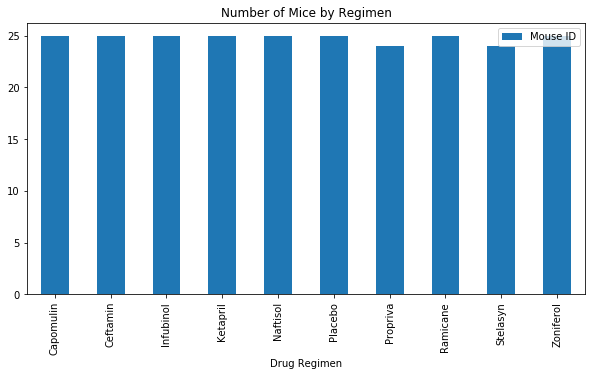

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

reg_mouse = (Analysis_data.drop_duplicates(["Drug Regimen","Mouse ID"], keep='last')).groupby(['Drug Regimen'], as_index=False)
reg_mouse = reg_mouse["Mouse ID"].count()
reg_mouse_chart = reg_mouse.plot('Drug Regimen', 'Mouse ID', kind = "bar", figsize=(10,5), title = "Number of Mice by Regimen")

reg_mouse

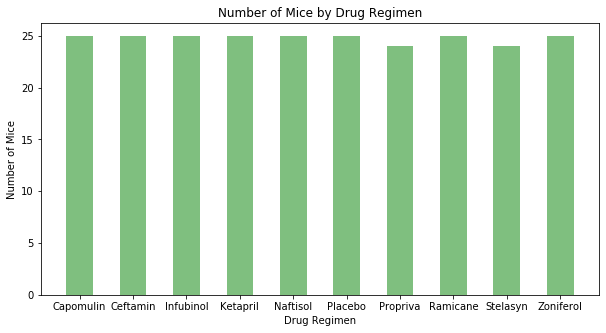

In [124]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_limit = 100

y_axis = reg_mouse["Mouse ID"]
x_axis = reg_mouse["Drug Regimen"]

f, ax = plt.subplots(figsize=(10,5))
plt.bar(x_axis,y_axis, color="Green",width = 0.5,  alpha = 0.5, align="center")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(reg_mouse["Drug Regimen"])
plt.title("Number of Mice by Drug Regimen")
plt.show()


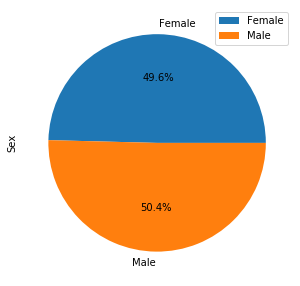

Sex    125
Name: Male, dtype: int64

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mouse = (Analysis_data.drop_duplicates(["Mouse ID", "Sex"], keep='last')).groupby(['Sex'])
gender_mouse = gender_mouse[["Sex"]].count()


gender_mouse


num_male=gender_mouse.iloc[1]
num_female=gender_mouse.iloc[0]
size=[num_male,num_female]
gender_mouse.plot(kind = "pie", subplots=True, autopct="%1.1f%%", figsize=(5,5))
plt.show()

num_male

,Sex
Sex,
Female,123
Male,125


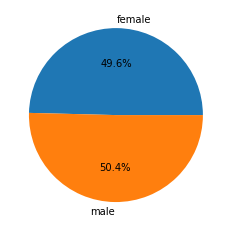

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=["female","male"]
plt.pie(gender_mouse["Sex"], labels = label, autopct="%1.1f%%")
#reg_mouse= pd.DataFrame(reg_mouse)
gender_mouse



## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Regimen4_t = (Analysis_data.set_index("Drug Regimen")).loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],
                                                           ["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

Regimen4D = Regimen4_t.drop_duplicates(['Mouse ID'], keep='last')

Regimen4D

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,s185,45,23.343598
Capomulin,x401,45,28.484033
Capomulin,m601,45,28.430964
Capomulin,f966,20,30.485985
Capomulin,u364,45,31.023923
...,...,...,...
Ceftamin,x226,0,45.000000
Ceftamin,x581,45,64.634949
Ceftamin,x822,45,61.386660


In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Regimen4D['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Regimen4D
outlier_volume = Regimen4D.loc[(Regimen4D['Tumor Volume (mm3)'] < lower_bound) | (Regimen4D['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume    
    

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,


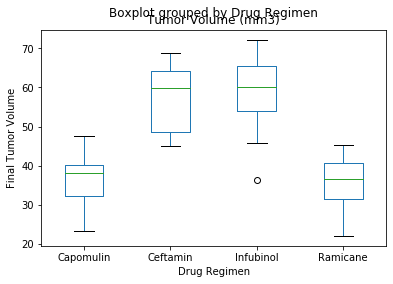

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = Regimen4D.boxplot(column=["Tumor Volume (mm3)"], by = 'Drug Regimen', grid= False)
boxplot.set_ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

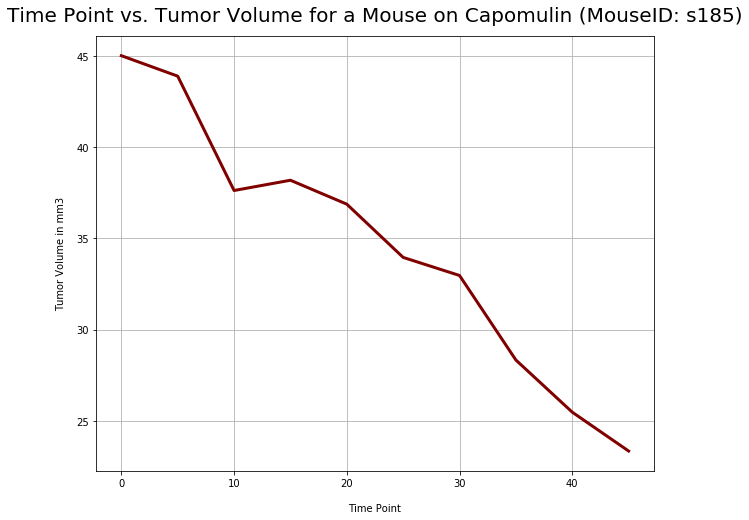

In [125]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = Analysis_data.loc[(Analysis_data['Drug Regimen']== 'Capomulin') & (Analysis_data['Mouse ID']== 's185')]
line_plot = capomulin.set_index('Timepoint')['Tumor Volume (mm3)'].plot(figsize=(10, 8), linewidth= 3 ,
                                                                        color = 'maroon', grid=True)
plt.xlabel("Time Point", labelpad=15)
plt.ylabel("Tumor Volume in mm3", labelpad=10)
plt.title("Time Point vs. Tumor Volume for a Mouse on Capomulin (MouseID: s185)", y=1.02, fontsize=20);

In [122]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

group_cap_mouse = Analysis_data.loc[Analysis_data['Drug Regimen']== 'Capomulin'].groupby('Mouse ID')
group_cap_mouse = group_cap_mouse['Tumor Volume (mm3)'].mean()

weight_vol = pd.merge(group_cap_mouse, mouse_metadata, on = "Mouse ID" )
#weight_vol

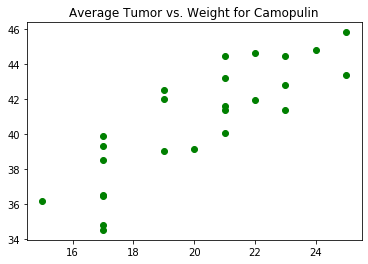

In [126]:
x_limit = 100
x_axis = weight_vol['Weight (g)']
y_axis = weight_vol['Tumor Volume (mm3)']
plt.title("Average Tumor vs. Weight for Camopulin")
plt.scatter(x_axis,y_axis, color="Green")
plt.show()

## Correlation and Regression

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_vol['Weight (g)'],weight_vol['Tumor Volume (mm3)'])
print(f"The correlation between Weight and Averag Tumor Volume is {round(correlation[0],2)}")

The correlation between Weight and Averag Tumor Volume is 0.84


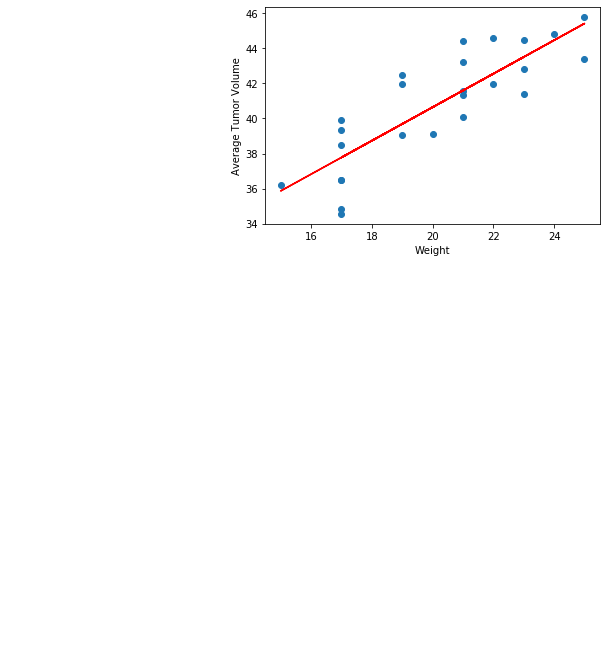

In [128]:
x_values = weight_vol['Weight (g)']
y_values = weight_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()